<a href="https://www.kaggle.com/code/fanbyprinciple/gradient-descent-visualisation-notebook?scriptVersionId=93532728" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Visualising Gradient Descent in a Jupyter Notebook

Lot of time Gradient descent is looked on as just another piece of jargon. Here I would like to implement it through animation to better understand it. I would be basically following this wonderful guide though - https://towardsdatascience.com/gradient-descent-animation-1-simple-linear-regression-e49315b24672

The gradient descent algorithm aims to minimize the mean squared error between observed data points (y) and points we predicted with our regression line (ŷ).

![](https://miro.medium.com/max/589/1*-Ftl7RWs1RsiaT9IJjrB-A.png)

Lets setup a simple linear regression model first to apply gradient descent to.

In [1]:
!pip install celluloid

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import celluloid
from celluloid import Camera

In [3]:
class LinearRegressioner(object):
    def __init__(self, w=1, b=1,lr=0.01):
        self.lr = lr
        self.w = np.array([[w]])
        self.b = np.array([b])
    
    def cost(self,x, y):
        pred = x@self.w + self.b
        e = y-pred
        return np.mean(e**2)
    
    def fit(self, x, y):
        pred = x@self.w + self.b
        e = y-pred
        dJ_dw = (np.mean(e*(-2*x), axis=0))
        dJ_db = (np.mean(e*(-2), axis=0))
        self.w = (self.w.T -self.lr * dJ_dw).T
        self.b = (self.b - self.lr * dJ_db)
    
    def predict(self, x):
        return x@self.w.T + self.b 
    
    def params(self):
        return (self.w, self.b)
        

Lets introduce the training data

In [4]:
x_train = np.array([     
    [1],
    [2],
    [4],
    [5],
    [6],
    [7]
])

y_train = np.array([     
    [4],
    [-12],
    [3],
    [-11],
    [-5],
    [-17]
])


We would be storing th parameter when training.

In [5]:
w_list = [] # for weight values
b_list = [] # for biases
c_list = [] # for cost values
ys_list = [] # prediction on xs
cl_list = [] # y values for x_train

xs = np.array([
    [-3],
    [10]
])

model = LinearRegressioner(w=3, b=-1,lr=0.001)

for i in range(60000):
    print(i, end="\r")
    w_list.append(model.params()[0])
    b_list.append(model.params()[1])
    c_list.append(model.cost(x_train, y_train))
    ys_list.append(model.predict(xs).T)
    cl_list.append(model.predict(x_train).T)
    model.fit(x_train, y_train)

print("Weight: ",str(model.params()[0]))
print("y-intercept: ", str(model.params()[1]))
print("costs: ", str(model.cost(x_train, y_train)))


Weight:  [[-2.]]
y-intercept:  [2.]
costs:  42.66666666666668


just to verify lets check with sklearn

In [6]:
import sklearn
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)

[[-2.]]
[2.]


Usually people talk about  a mountain analogy when referring to gradient descent. In ‘mountain’-analogy, creating a 3D visualization of gradient descent seems desirable. However, this requires some preliminary work since we have to create some data points we never encountered during the fitting process. In other words, we need to compute costs for every possible pair of w and b over a predefined range of parameter values to obtain a surface plot. Fortunately, numpy has a built-in function called meshgrid, which enables us to create coordinate grids for our three-dimensional plots.

In [7]:
def cost_3d(x,y,w,b):
    pred = x @ w.T + b
    e = y-pred
    return np.mean(e**2)

ws = np.linspace(-5,5.0, 10)
bs = np.linspace(-5, 5, 10)
M, B = np.meshgrid(ws, bs)

zs = np.array([cost_3d(x_train,y_train,       # determine costs for each pair of w and b 
        np.array([[wp]]), np.array([[bp]]))  # cost_3d() only accepts wp and bp as matrices. 
               for wp, bp in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)


In [8]:
# Define which epochs/data points to plot
a=np.arange(0,50,1).tolist()
b=np.arange(50,100,5).tolist()
c=np.arange(100,12000,200).tolist()
p = a+b+c # points we want to plot

# Turn lists into arrays
w= np.array(w_list).flatten()
b= np.array(b_list).flatten()
c= np.array(c_list).flatten()
ys = np.array(ys_list) 
p=np.array(p)

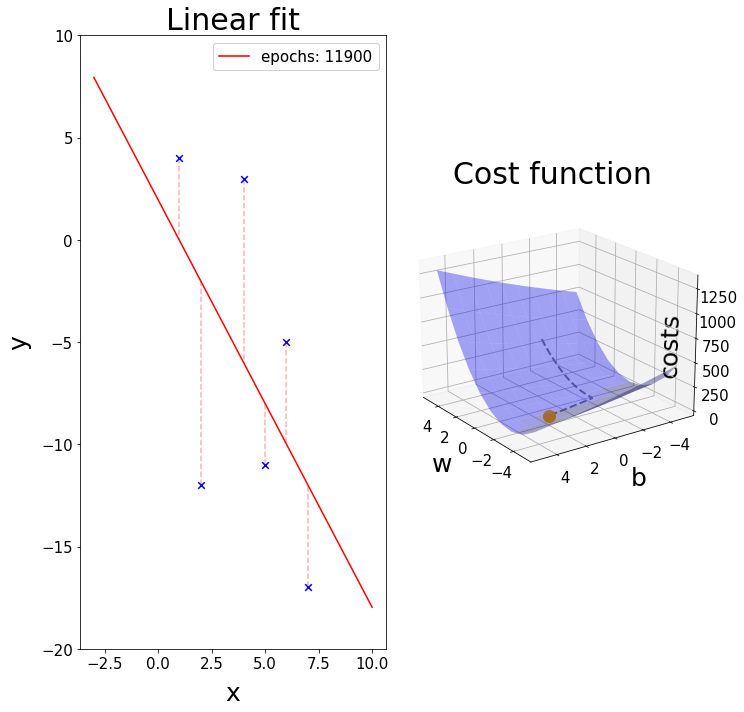

In [9]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(121)
ax1.set_title("Linear fit", fontsize=30)
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_title("Cost function", fontsize=30)
ax2.view_init(elev=20., azim=145)
camera = Camera(fig)

for i in p:       
    leg=ax1.plot(xs.T.flatten(),ys[i].flatten(), color='r', label=str(i))  
    ax1.vlines(x_train.T, ymin=y_train.T, ymax=cl_list[i], linestyle="dashed",
               color='r',alpha=0.3)
    ax1.scatter(x_train, y_train, color='b',marker='x', s=44)
    ax1.legend(leg,[f'epochs: {i}'], loc='upper right', fontsize=15) 
    ax1.set_xlabel("x", fontsize=25, labelpad=10)
    ax1.set_ylabel("y", fontsize=25, labelpad=10)
    ax1.tick_params(axis='both', which='major', labelsize=15) 
    ax1.set_ylim([-20, 10])
    
    ax2.plot_surface(M, B, Z, rstride=1, cstride=1, color='b',
                     alpha=0.35) # create surface plot
    ax2.scatter(w[i],b[i],c[i],marker='o', s=12**2, color='orange' )
    ax2.set_xlabel("w", fontsize=25, labelpad=10)
    ax2.set_ylabel("b", fontsize=25, labelpad=10)
    ax2.set_zlabel("costs", fontsize=25,
    labelpad=-35) # negative value for labelpad places z-label left of z-axis.
    ax2.tick_params(axis='both', which='major', labelsize=15) 
    ax2.plot(w[0:i],b[0:i],c[0:i], linestyle="dashed",linewidth=2,
             color="grey") # (dashed) lineplot
    
    plt.tight_layout()
    camera.snap()
    
animation = camera.animate(interval = 5,
                          repeat = False, repeat_delay = 500)
animation.save('SimpleLinReg_3.gif', writer = 'imagemagick')